<a href="https://colab.research.google.com/github/Mehul6112/Data-Science_curve/blob/main/Bike%20Rental%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:**

Welcome to my exciting exploration of bike rental data from Yulu, a renowned bike rental company. In this journey to analyze and uncover valuable insights hidden within this dataset. We will utilize the powerful capabilities of Python libraries such as pandas, matplotlib, and seaborn to unravel the secrets behind bike rental patterns and trends.

## **Data Exploration:**

1. **Data Cleaning:**
    * Load the dataset into a pandas DataFrame.
    * Check for missing values and handle them appropriately.
    * Identify and remove any outliers or inconsistencies in the data.

2. **Exploratory Data Analysis:**
    * Investigate the distribution of bike rentals across different time periods (e.g., hourly, daily, weekly, monthly).
    * Analyze the relationship between weather conditions and bike rentals.
    * Explore the impact of user demographics (e.g., age, gender) on bike rental patterns.
    * Identify popular pick-up and drop-off locations.

## **Visualization:**

1. **Data Visualization:**
    * Utilize matplotlib and seaborn to create compelling visualizations that showcase the findings from our data exploration.
    * Generate bar charts, histograms, scatter plots, and heatmaps to illustrate trends and patterns in the data.
    * Ensure that the visualizations are clear, informative, and visually appealing.

2. **Interactive Visualization:**
    * Employ interactive visualization libraries such as Bokeh or Plotly to create interactive dashboards and plots.
    * Allow users to explore the data and gain insights based on their own selections and filters.


In [20]:
# Importing neccessary modules
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/content/sample_data/Yulu.csv")
df.sample(10) # random data from our dataset

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5388,2011-12-18 14:00:00,4,0,0,1,12.30,14.395,49,19.0012,19,200,219
10767,2012-12-15 01:00:00,4,0,0,2,10.66,14.395,81,6.0032,9,86,95
8696,2012-08-04 17:00:00,3,0,0,1,36.08,39.395,37,19.9995,179,313,492
5669,2012-01-11 09:00:00,1,0,1,2,8.20,10.605,86,8.9981,7,218,225
6506,2012-03-08 08:00:00,1,0,1,1,18.04,21.970,77,26.0027,12,573,585
3415,2011-08-12 05:00:00,3,0,1,1,24.60,31.060,56,8.9981,2,24,26
3116,2011-07-18 18:00:00,3,0,1,1,33.62,38.635,49,23.9994,80,478,558
3033,2011-07-15 07:00:00,3,0,1,1,26.24,30.305,65,7.0015,17,257,274
1154,2011-03-12 18:00:00,1,0,0,1,17.22,21.210,54,11.0014,54,91,145
1946,2011-05-08 00:00:00,2,0,0,2,20.50,24.240,59,7.0015,22,78,100


<a name = "About"></a>
## About this data

| Column         | Description                                                          |
|----------------|----------------------------------------------------------------------|
| **datetime**   | Date and Time                                                        |
| **season**     | Season <br> (1: Spring, 2: Summer, 3: Fall, 4: Winter)               |
| **holiday**    | Holiday Indicator <br> (1: Yes, 0: No)                               |
| **workingday** | Working Day Indicator <br> (1: Yes, 0: No)                           |
| **weather**    | Weather Conditions: <br>1: Clear, Few Clouds, Partly Cloudy <br>2: Mist, Cloudy <br>3: Light Snow, Light Rain <br>4: Heavy Rain, Snow, Fog |
| **temp**       | Temperature (°C)                                                     |
| **atemp**      | "Feels Like" Temperature (°C)                                         |
| **humidity**   | Humidity (%)                                                         |
| **windspeed**  | Wind Speed (km/h)                                                    |
| **casual**     | Count of Casual Users                                                |
| **registered** | Count of Registered Users                                            |
| **count**      | Total Count of Rental Bikes (Casual + Registered Users)              |


## Critical Factors to Assess in Dataset Analysis:

Explore the dataset with a keen eye to uncover various anomalies and issues that may affect data quality and analysis. Here are some key aspects to consider:

* **Duplicate Rows:** 🔄 Check for duplicate rows in the dataset, which can distort analysis and lead to inaccurate insights. Eliminate duplicates to ensure data integrity and reliability.

* **Outliers:** 📊 Identify outliers lurking within the data, as they can skew statistical analyses and distort patterns. Carefully examine outliers to determine their impact and consider appropriate handling strategies.

* **Incorrect Data Types:** 📝 Ensure that each column's data type aligns with its intended purpose. Verify that numerical data is represented as integers or floats, dates are in datetime format, and categorical variables are appropriately encoded.

* **Inconsistent Data Entry:** 🔄 Look out for inconsistencies in data entry, such as variations in spelling, formatting, or capitalization. Standardize data entry conventions to maintain consistency and improve data quality.


In [3]:
# The .duplicated() returns true/false value for any repetitions, and .sum() adds all these 0 & 1s column wise. If the sum is 0 then that means no duplicate data.
df.datetime.duplicated().sum() #checking for dates as that would impact if duplicate rows exist.

0

In [4]:
# converting date-time column to a more usable format that is native to pandas
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

Let's check for any missing values.

In [5]:
# Check for missing values
missing_values = df.isnull()
# Summarize missing values
missing_values_summary = missing_values.sum()
print(missing_values_summary)


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


Looks like our data has no missing values, which is great. <br>
However, you may have noticed that certain columns like Season, Weather, Holiday, and Working Day contain numerical data with specific meanings, as elaborated in the [**About this Data**](#About) section. It would greatly enhance our analysis if we could map these numerical values to their corresponding descriptions. Doing so will make our visualizations more intuitive.

In [6]:
#using the map function to improve our dataset
df.holiday = df.holiday.map({0: 'No', 1: 'Yes'})
df.season = df.season.map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
df.workingday = df.workingday.map({0: 'No', 1: 'Yes'})
df.weather = df.weather.map({1: "Clear, Few Clouds, Partly Cloudy", 2: "Mist, Cloudy", 3: "Light Snow, Light Rain", 4: "Heavy Rain, Snow, Fog"})

# Extract additional time components
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df.sample(10) # to see a sample of our improved dataset

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year
9681,2012-10-07 18:00:00,Winter,No,No,"Light Snow, Light Rain",16.40,20.455,82,12.9980,24,82,106,7,10,2012
3713,2011-09-05 15:00:00,Fall,Yes,No,"Mist, Cloudy",27.88,31.820,79,19.0012,111,142,253,5,9,2011
4890,2011-11-16 20:00:00,Winter,No,Yes,"Light Snow, Light Rain",18.04,21.970,88,26.0027,5,94,99,16,11,2011
3370,2011-08-10 08:00:00,Fall,No,Yes,"Clear, Few Clouds, Partly Cloudy",30.34,33.335,51,12.9980,38,361,399,10,8,2011
8908,2012-08-13 13:00:00,Fall,No,Yes,"Clear, Few Clouds, Partly Cloudy",31.98,34.850,40,11.0014,79,175,254,13,8,2012
6510,2012-03-08 12:00:00,Spring,No,Yes,"Mist, Cloudy",22.96,26.515,60,30.0026,27,224,251,8,3,2012
9035,2012-08-18 20:00:00,Fall,No,No,"Clear, Few Clouds, Partly Cloudy",28.70,31.820,45,7.0015,99,242,341,18,8,2012
5680,2012-01-11 20:00:00,Spring,No,Yes,"Light Snow, Light Rain",13.12,15.910,93,11.0014,2,55,57,11,1,2012
5138,2011-12-08 04:00:00,Winter,No,Yes,"Mist, Cloudy",9.84,9.850,60,31.0009,0,2,2,8,12,2011
8729,2012-08-06 02:00:00,Fall,No,Yes,"Mist, Cloudy",29.52,34.850,79,8.9981,0,5,5,6,8,2012


Looks much better right?

In [7]:
# lets try to get an overview of numerical data using the .describe() function.
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,9.992559,6.521495,2011.501929
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,5.000000,4.000000,2011.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,10.000000,7.000000,2012.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,15.000000,10.000000,2012.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,19.000000,12.000000,2012.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,5.476608,3.444373,0.500019


In [13]:
# lets group our data on several metrics like holiday, hours & weather conditions so that we can differentiate our findings based on these clusters.
# for this .groupby() function is very handy
hourly_grouped_df = df.groupby(df['datetime'].dt.hour)
#dt.hour is used to access the hour componenet of the date-time column(Note that to use this, you must convert your datetime column to pandas date time data type.)
daily_grouped_df = df.groupby([df.datetime.dt.day_of_week])
holiday_grouped_df = df.groupby(df.holiday, as_index = False)
weather_grouped_df = df.groupby(df.weather, as_index = False)

## **Insights and Conclusion:**

1. **Meaningful Questions and Inquiries:**
    * What are the peak hours and days for bike rentals?
    * How does weather affect the demand for bike rentals?
    * Are there any specific user demographics that are more likely to rent bikes?
    * Which pick-up and drop-off locations are the most popular?
    * Can we predict future bike rental demand based on historical data?

2. **Conclusions and Recommendations:**
    * Summarize the key insights and findings from the analysis.
    * Provide recommendations for Yulu based on your findings.
    * Suggest potential areas for future exploration and improvement.


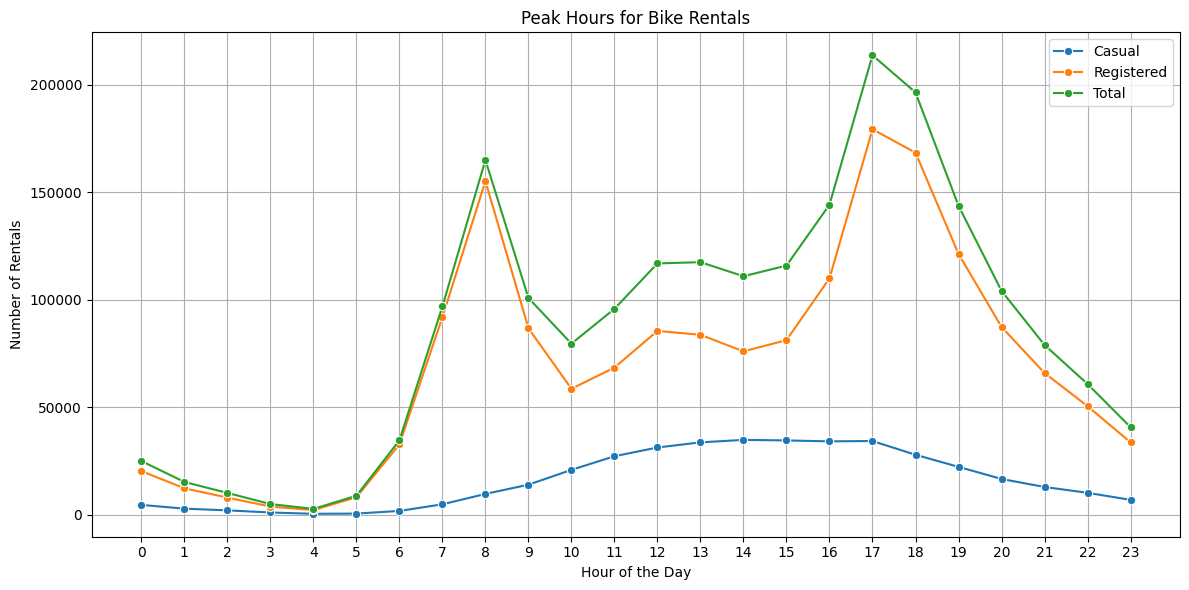

In [11]:
# Plotting a graph to understand peak hour for bike rentals which are separated by casual & registered accounts.
hourly_counts = hourly_grouped_df[['count', 'casual', 'registered']].sum().reset_index()

plt.figure(figsize=(12, 6))

# Peak Hours for Casual Users
sns.lineplot(x='datetime', y='casual', data=hourly_counts, label='Casual', marker='o')

# Peak Hours for Registered Users
sns.lineplot(x='datetime', y='registered', data=hourly_counts, label='Registered', marker='o')

# Total Count
sns.lineplot(x='datetime', y='count', data=hourly_counts, label='Total', marker='o')

plt.title('Peak Hours for Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The graph illustrates that the **peak hours for bike rentals are at 5 PM and 8 AM**. At 5 PM, there is a **notable surge** in rentals, indicating that users are likely utilizing the bikes for commuting back home after work. Similarly, the peak at 8 AM suggests a high demand for bikes during the morning rush hour, possibly for commuting to work or other early morning activities.

Throughout the day, bike rentals show a **consistent trend of higher counts between 8 AM to 5 PM** compared to other hours. This suggests that the service experiences heightened usage during regular business hours, indicating a strong demand for bikes.

The story is almost similar for registered and total counts and one can also infer that the **bulk of the order value comes from registered accounts** while the casual data is almost flat barely touching the 40000 mark in the peak-hour time frame during this extensive 2 year data.

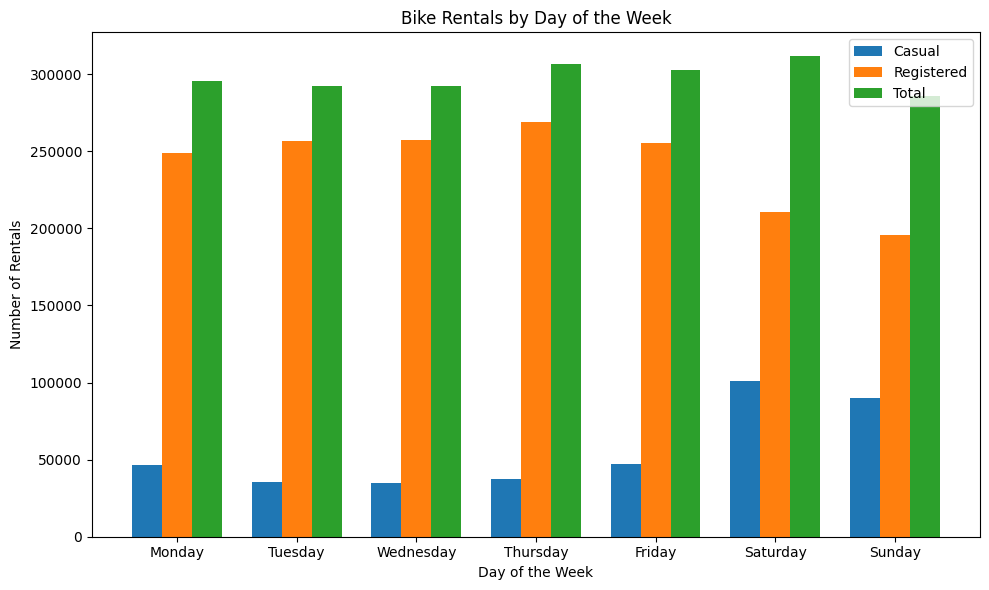

In [22]:
# Plotting a graph to understand peak hour for bike rentals which are separated by casual & registered accounts.
day_counts = daily_grouped_df[['count', 'casual', 'registered']].sum().reset_index()

# Plotting a bar graph for bike rentals separated by casual and registered accounts for each day of the week
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.25

# Bar positions
bar_positions = np.arange(len(day_counts))

# Plot bars for casual counts
plt.bar(bar_positions - bar_width, day_counts['casual'], bar_width, label='Casual')

# Plot bars for registered counts
plt.bar(bar_positions, day_counts['registered'], bar_width, label='Registered')

# Plot bars for total counts
plt.bar(bar_positions + bar_width, day_counts['count'], bar_width, label='Total')

# X-axis labels
plt.xticks(bar_positions, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rentals')
plt.title('Bike Rentals by Day of the Week')
plt.legend()
plt.tight_layout()
plt.show()


The graph unveils a fascinating insight: while previous analyses hinted at a relatively stable trend in casual users' rental counts with a slight increment during peak hours, a distinct narrative emerges for weekends. During weekends, casual users exhibit nearly double the rental activity compared to weekdays, a noteworthy departure from the norm.

Conversely, registered users witness a decline in rental activity over weekends, indicating divergent preferences in rental behavior between these user segments.

Remarkably, the total rental count appears relatively unaffected by the day factor, suggesting a consistent overall demand throughout the week.
